In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
umx_path = Path("/media/mvitry/Windows/umx")
output_paths = [f for f in umx_path.iterdir() if f.name.startswith("output")]
output_data = list()

In [3]:
for p in output_paths:
    with open(p.joinpath("clean_electric_guitar.json")) as handle:
        output_data.append(json.load(handle))

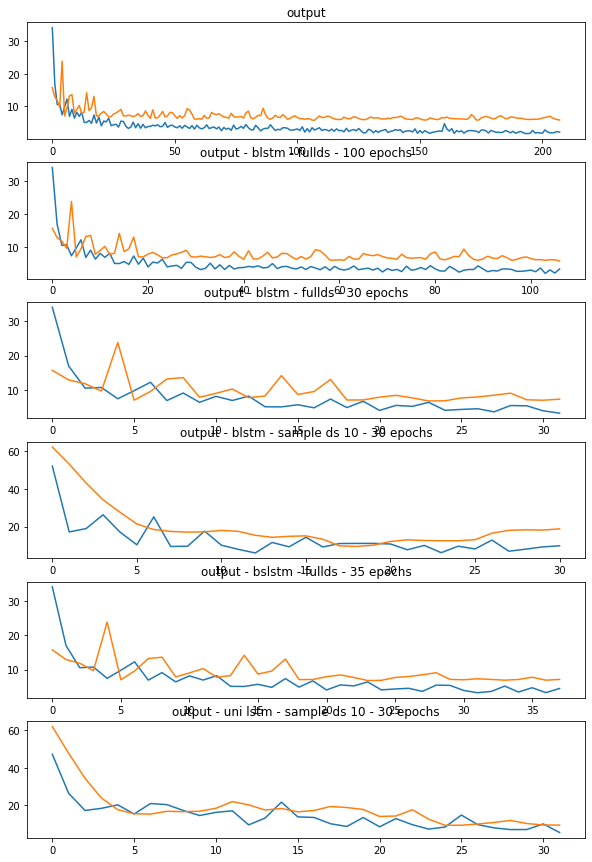

In [5]:
fig, axs = plt.subplots(len(output_data), 1, figsize=(10, 15))

for i, ax in enumerate(axs):
    ax.plot(output_data[i]["train_loss_history"], label="train")
    ax.plot(output_data[i]["valid_loss_history"], label="valid")
    ax.set_title(output_paths[i].name)
    
plt.show()

